MAPA: NACIMIENTOS(SHARE BY PROVINCE)

In [2]:
import geopandas as gpd
from zipfile import ZipFile
from pathlib import Path
import pandas as pd

%matplotlib inline

In [3]:
# raw data
zipped_files_path = Path("C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/nacimientos")



In [4]:
zipped_files = list(zipped_files_path.glob("*.zip"))

zipped_files

[WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/nacimientos/female_population.zip'),
 WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/nacimientos/provincias.zip')]

In [5]:
csv_zipped = ZipFile(zipped_files[0]) 
shape_zipped = ZipFile(zipped_files[1])

In [6]:
extrafiles_path = Path("C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/nacimientos/interim/extracted/")
extrafiles_path

WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/nacimientos/interim/extracted')

In [7]:
csv_zipped.extractall(extrafiles_path / 'csv_files')
shape_zipped.extractall(extrafiles_path / 'shape_files')

In [8]:
shape_extracted_dir = extrafiles_path / 'shape_files'
shape_extracted_dir

csv_extracted_dir = extrafiles_path / 'csv_files'
csv_extracted_dir

WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/nacimientos/interim/extracted/csv_files')

In [9]:
!dir - shape_extracted_dir


 El volumen de la unidad C es Windows-SSD
 El número de serie del volumen es: C23F-BB8A

 Directorio de C:\Users\Fiorella


 Directorio de C:\Users\Fiorella

21/08/2022  22:47               128 shape_extracted_dir
               1 archivos            128 bytes
               0 dirs  274,067,595,264 bytes libres


In [10]:
#from realpython.com (https://realpython.com/python-pathlib/#display-a-directory-tree)
def tree(directory):
    print(f'+ {directory}')
    for path in sorted(directory.rglob('*')):
        depth = len(path.relative_to(directory).parts)
        spacer = '    ' * depth
        print(f'{spacer}+ {path.name}')

In [11]:
tree(shape_extracted_dir)

+ C:\Users\Fiorella\OneDrive - UDEP\TIE1\Bases de datos\05_dataviz\pregnant\nacimientos\interim\extracted\shape_files
    + provincias
        + provincias.zip


In [12]:
ZipFile(shape_extracted_dir / 'provincias' / 'provincias.zip').extractall(extrafiles_path / 'provincias_shape')

In [13]:
shape_extracted_dir

WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/nacimientos/interim/extracted/shape_files')

In [14]:
tree(extrafiles_path)

+ C:\Users\Fiorella\OneDrive - UDEP\TIE1\Bases de datos\05_dataviz\pregnant\nacimientos\interim\extracted
    + csv_files
        + female_population
            + borns_register.csv
    + provincias_shape
        + provincias
            + PROVINCIAS.cpg
            + PROVINCIAS.dbf
            + PROVINCIAS.prj
            + PROVINCIAS.shp
            + PROVINCIAS.shp.xml
            + PROVINCIAS.shx
    + shape_files
        + provincias
            + provincias.zip


In [15]:
extrafiles_path

WindowsPath('C:/Users/Fiorella/OneDrive - UDEP/TIE1/Bases de datos/05_dataviz/pregnant/nacimientos/interim/extracted')

In [16]:
geo_data = gpd.read_file(extrafiles_path / 'provincias_shape'/ 'provincias' / 'PROVINCIAS.shp')

geo_data


,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943..."
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510..."
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140..."
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904..."
...,...,...,...,...,...,...,...
191,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412..."
192,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
193,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411..."
194,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230..."


<AxesSubplot:>

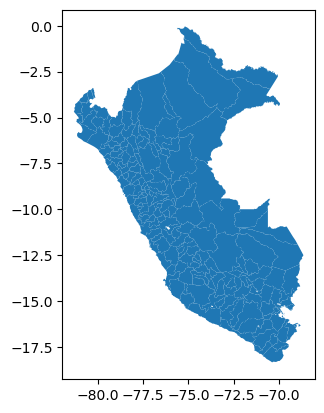

In [17]:
geo_data.plot()

In [18]:
population_data = pd.read_csv( extrafiles_path / 'csv_files' / 'female_population' / 'borns_register.csv',  delimiter = '\t', dtype={"PROVINCIA":"string"})





population_data.head()



,PROVINCIA,TOTAL,POPULATION
0,ABANCAY,2508,21354
1,ACOBAMBA,1033,4966
2,ACOMAYO,54,326
3,ALTO AMAZONAS,4468,18867
4,AMBO,696,4024


In [19]:
common_cols = [col for col in population_data.columns if col in geo_data.columns]

common_cols

['PROVINCIA']

In [20]:
population_data

,PROVINCIA,TOTAL,POPULATION
0,ABANCAY,2508,21354
1,ACOBAMBA,1033,4966
2,ACOMAYO,54,326
3,ALTO AMAZONAS,4468,18867
4,AMBO,696,4024
...,...,...,...
184,YAROWILCA,339,1632
185,YAULI,196,2070
186,YUNGAY,507,2770
187,YUNGUYO,333,2280


In [21]:
merged_data = geo_data.merge(population_data, on = 'PROVINCIA')
merged_data

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry,TOTAL,POPULATION
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",2052,12890
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",1767,9000
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",231,1399
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",594,2350
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",152,1221
...,...,...,...,...,...,...,...,...,...
182,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...",320,2478
183,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",12612,67751
184,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411...",1245,4785
185,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...",1313,6785


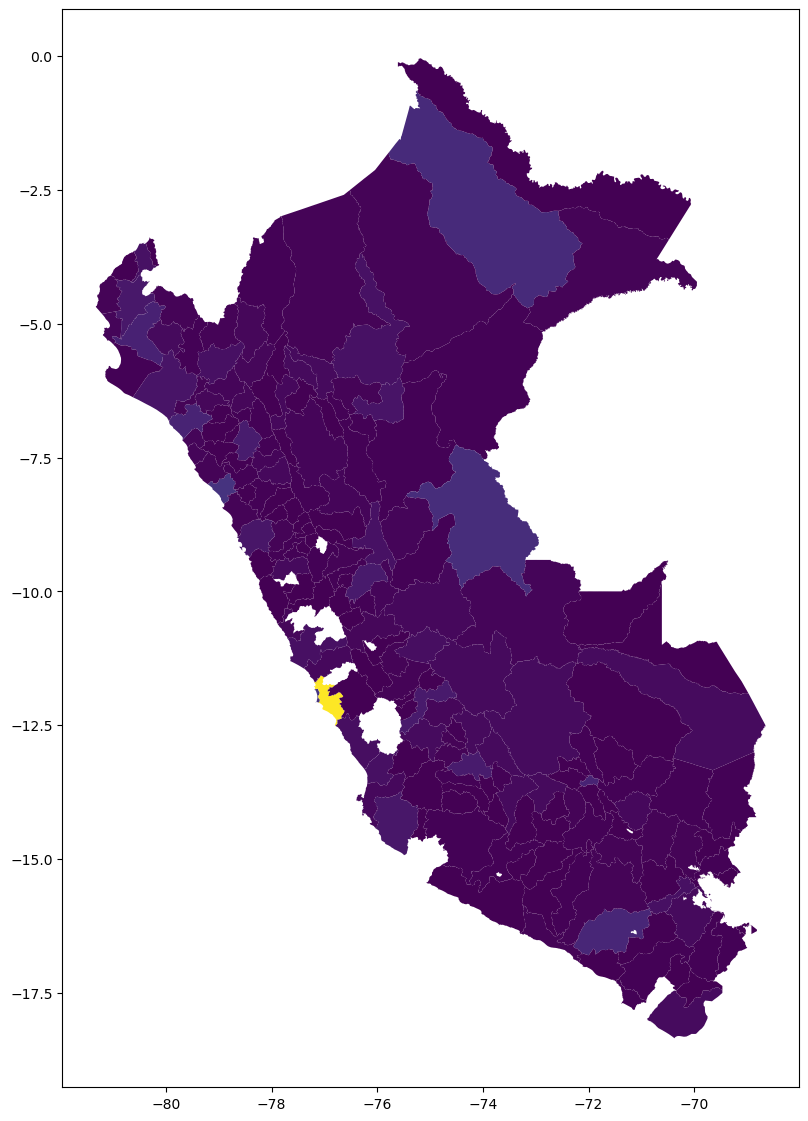

In [22]:
merged_data.plot(column = 'TOTAL', figsize = (14,14));

In [23]:
#We can then get B.A. share by dividing AH04E022 / AH04E001
#And B.A.+ share by dividing AH04E022 + AH04E023 + AH04E024 + AH04E025 / AH04E001

merged_data['W_share'] = (merged_data['TOTAL']) / merged_data['POPULATION']



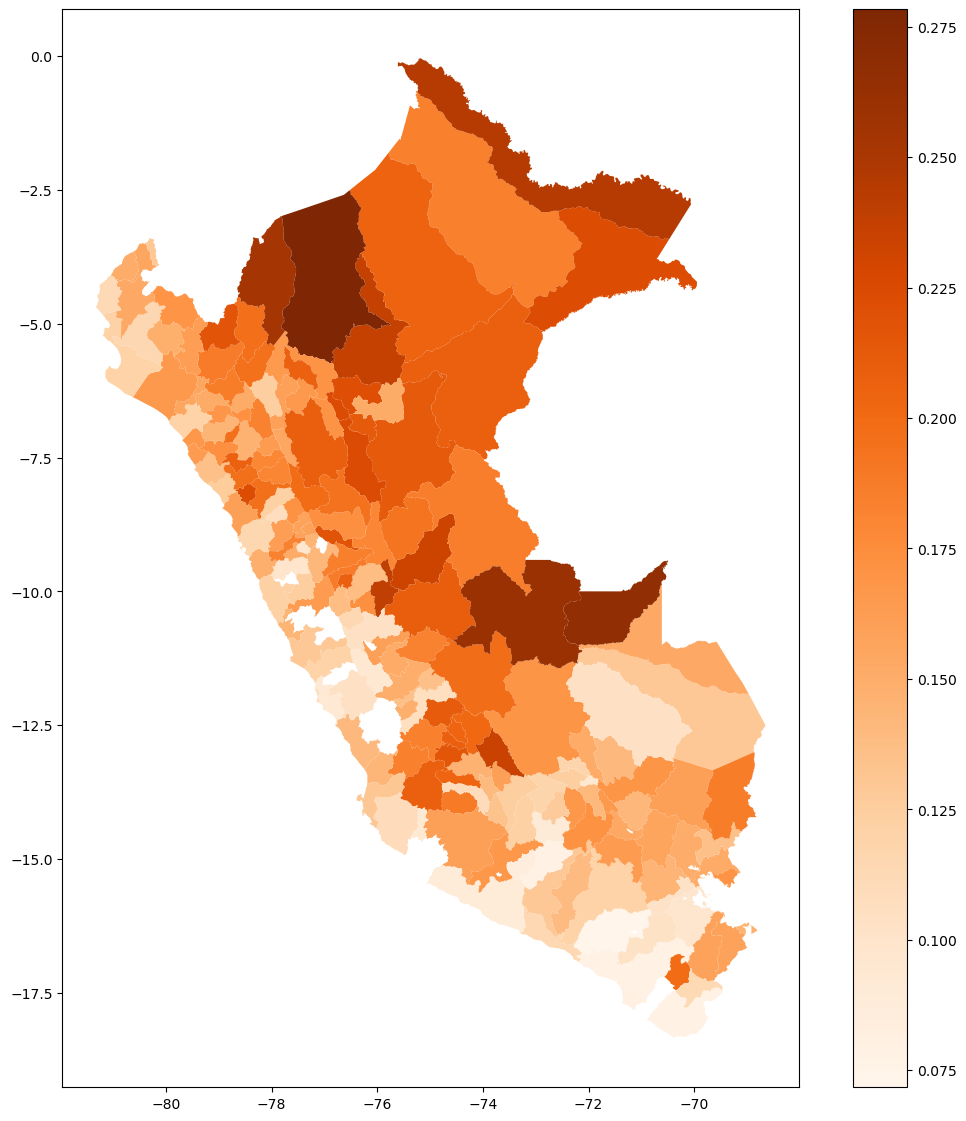

In [24]:
merged_data.plot(column = 'W_share', figsize = (14,14), legend = True, cmap = 'Oranges');

In [25]:
for col in merged_data.columns:
    print(col)

IDDPTO
DEPARTAMEN
IDPROV
PROVINCIA
CAPITAL
FUENTE
geometry
TOTAL
POPULATION
W_share


In [26]:
subset = merged_data[['PROVINCIA', 'W_share', 'geometry']]

In [27]:
import geoplot.crs as gcrs
import geoplot
import matplotlib.pyplot as plt
from pyproj import CRS

In [28]:
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326", "epsg:3857")
transformer.transform(12, 12)

(1335833.8895192828, 1345708.4084091089)

In [29]:
CRS = {"init": "epsg:3857"}

subset_4326 = subset.to_crs(epsg = 4326)

subset_4326


,PROVINCIA,W_share,geometry
0,CHACHAPOYAS,0.159193,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943..."
1,BAGUA,0.196333,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510..."
2,BONGARA,0.165118,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140..."
3,CONDORCANQUI,0.252766,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
4,LUYA,0.124488,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904..."
...,...,...,...
182,ZARUMILLA,0.129136,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412..."
183,CORONEL PORTILLO,0.186152,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
184,ATALAYA,0.260188,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411..."
185,PADRE ABAD,0.193515,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230..."


C:\Users\Fiorella\AppData\Local\Temp\ipykernel_13920\2449381404.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


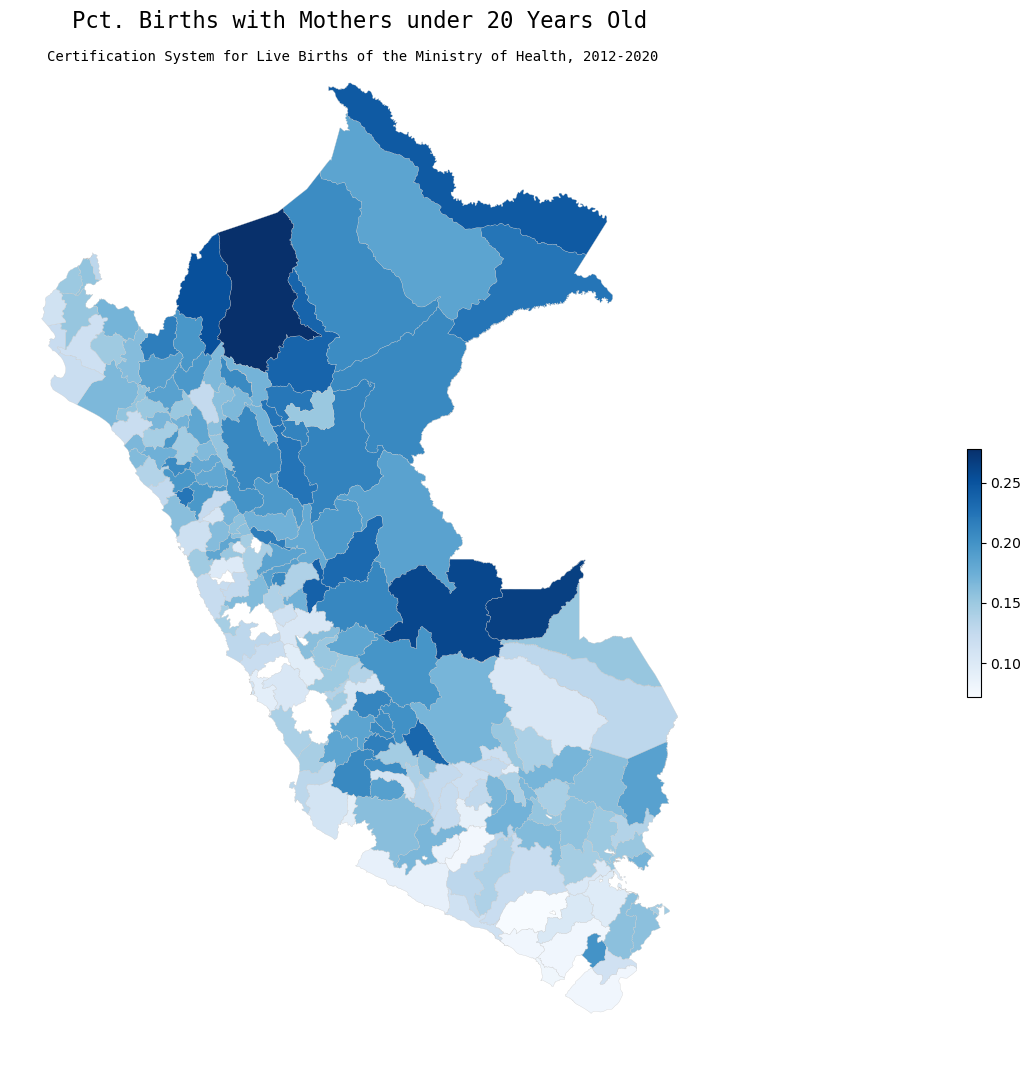

In [41]:
# for insta: cmap= 'RdPu' o 'RdPu_r'
fig, ax = plt.subplots(1, figsize=(13.50, 10.80))

subset_4326.plot(column='W_share', cmap='Blues', linewidth=0.2, ax=ax, edgecolor='#c8c8c8', legend = False,);
ax.axis('off');

# Now adding the colorbar
mappable = ax.collections[0]
cbaxes = fig.add_axes([0.95, 0.35, 0.01, 0.23]) 
fig.colorbar(mappable,cax = cbaxes, shrink = 0.5, format = '%.2f')

ax.set_title("Pct. Births with Mothers under 20 Years Old", fontdict= {'fontsize': '16', 'fontweight': '5', 'fontfamily': 'monospace'}, loc = 'center', );
ax.annotate('Certification System for Live Births of the Ministry of Health, 2012-2020', xy=(0.49,0.98), xycoords = 'axes fraction', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 10, color = '#000000', fontfamily='monospace');

plt.tight_layout()